In [17]:
import implicit
import pandas as pd
import scipy.sparse as sparse

#### Analyze the customers

In [67]:
desktop_path = "/Users/erikagromule/Desktop"
file_path = desktop_path + "/customers.csv"

data = pd.read_csv(file_path)

In [14]:
data.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [69]:
data.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [26]:
total_rows = data.shape[0]
print(f"Total Rows: {total_rows}")

Total Rows: 1371980


In [15]:
youngest_age = data['age'].min()
oldest_age = data['age'].max()

print(f"Youngest age: {youngest_age}")
print(f"Oldest age: {oldest_age}")

Youngest age: 16.0
Oldest age: 99.0


In [17]:
unique_ages = data['age'].unique()
print("Unique Ages:")
print(unique_ages)

Unique Ages:
[49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97.
 89. 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


In [19]:
pd.set_option('display.max_rows', None)

#the occurrences of all unique ages
age_counts = data['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

print("Unique Ages and Counts:")
print(age_counts)

Unique Ages and Counts:
     Age  Count
0   21.0  67530
1   24.0  56124
2   20.0  55196
3   25.0  54989
4   23.0  54867
5   26.0  53658
6   22.0  51869
7   27.0  49134
8   28.0  44294
9   29.0  40697
10  30.0  39235
11  19.0  37707
12  31.0  36354
13  51.0  29720
14  50.0  28920
15  32.0  28354
16  52.0  27956
17  49.0  27895
18  48.0  25715
19  53.0  25191
20  33.0  24814
21  18.0  24323
22  54.0  23539
23  47.0  23403
24  55.0  22275
25  46.0  21908
26  34.0  21763
27  56.0  20393
28  35.0  19887
29  45.0  19704
30  44.0  18602
31  57.0  18475
32  36.0  17465
33  43.0  17442
34  41.0  16994
35  42.0  16297
36  40.0  16158
37  37.0  16044
38  58.0  16005
39  38.0  15242
40  39.0  14910
41  59.0  13768
42  60.0  12534
43  61.0  10948
44  62.0   9436
45  17.0   9392
46  63.0   8141
47  64.0   7089
48  65.0   6035
49  66.0   5468
50  67.0   4742
51  68.0   4394
52  69.0   3836
53  70.0   3274
54  71.0   3010
55  72.0   2602
56  73.0   2214
57  74.0   2043
58  75.0   1527
59  76.0   1048


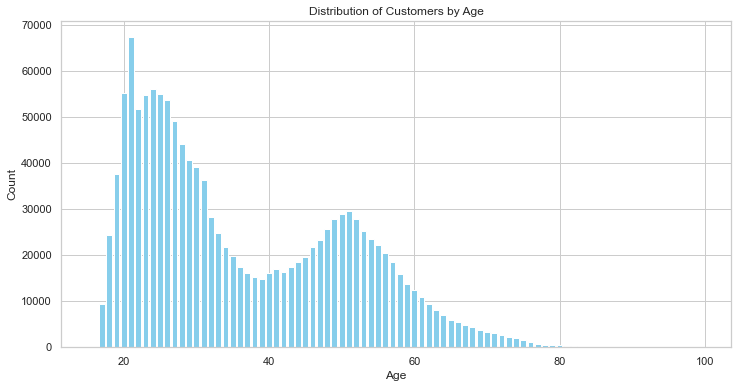

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
age_counts = data['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

#the plot
plt.figure(figsize=(12, 6))
plt.bar(age_counts['Age'], age_counts['Count'], color='skyblue')
plt.title('Distribution of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

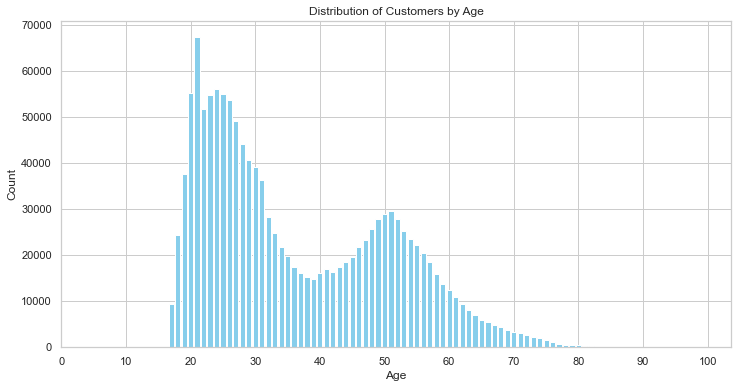

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)
age_counts = data['age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

#the plot
plt.figure(figsize=(12, 6))
plt.bar(age_counts['Age'], age_counts['Count'], color='skyblue')
plt.title('Distribution of Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')

#set ticks at intervals of 10
tick_interval = 10
age_ticks = np.arange(0, max(age_counts['Age']) + tick_interval, tick_interval)
plt.xticks(age_ticks)

plt.show()

In [20]:
frequency_counts = data['fashion_news_frequency'].value_counts()

print("Measures or Frequencies of 'fashion_news_frequency':")
print(frequency_counts)

Measures or Frequencies of 'fashion_news_frequency':
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64


In [21]:
regular_customers = data[data['fashion_news_frequency'] == 'Regularly']

#the regular customers by age and count the occurrences
age_group_counts = regular_customers['age'].value_counts()

print("Age groups with regular customers:")
print(age_group_counts)

Age groups with regular customers:
21.0    26623
20.0    21894
22.0    19948
23.0    19523
24.0    18358
25.0    17180
26.0    16328
19.0    15055
27.0    14655
28.0    13277
29.0    12430
30.0    12018
31.0    11004
51.0    10700
50.0    10389
52.0    10228
49.0     9913
53.0     9141
48.0     9140
54.0     8803
32.0     8790
55.0     8485
47.0     8301
18.0     8107
46.0     7877
33.0     7776
56.0     7683
45.0     7152
57.0     7065
34.0     6798
44.0     6600
35.0     6393
43.0     6231
58.0     6165
42.0     5933
41.0     5930
36.0     5746
40.0     5667
59.0     5437
37.0     5366
39.0     5358
38.0     5266
60.0     4987
61.0     4372
62.0     3858
63.0     3401
64.0     3004
17.0     2987
65.0     2562
66.0     2338
67.0     2015
68.0     1899
69.0     1724
70.0     1423
71.0     1330
72.0     1099
73.0      978
74.0      891
75.0      692
76.0      478
77.0      345
78.0      236
79.0      206
80.0      169
81.0      129
82.0       86
16.0       75
83.0       50
84.0       41

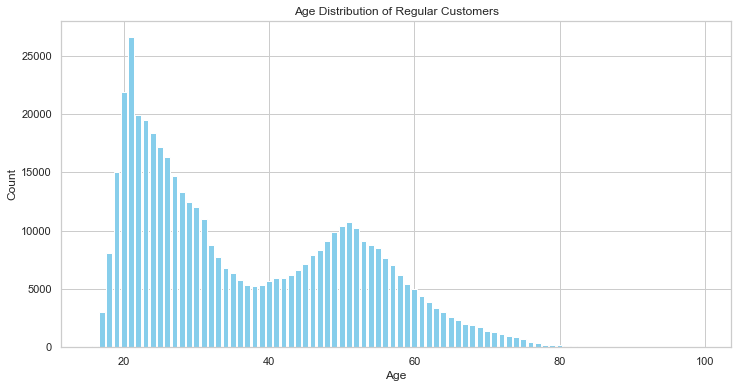

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#regular customers
regular_customers = data[data['fashion_news_frequency'] == 'Regularly']
age_group_counts = regular_customers['age'].value_counts().reset_index()
age_group_counts.columns = ['Age', 'Count']

#plot
plt.figure(figsize=(12, 6))
plt.bar(age_group_counts['Age'], age_group_counts['Count'], color='skyblue')
plt.title('Age Distribution of Regular Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

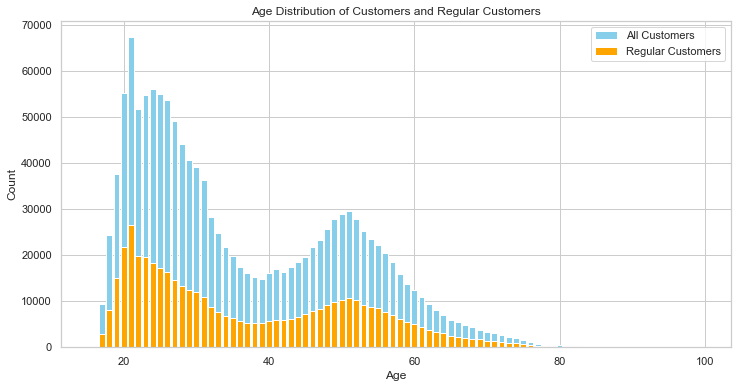

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

#all customers
all_age_counts = data['age'].value_counts().reset_index()
all_age_counts.columns = ['Age', 'All_Customers_Count']

#regular customers
regular_customers = data[data['fashion_news_frequency'] == 'Regularly']
regular_age_counts = regular_customers['age'].value_counts().reset_index()
regular_age_counts.columns = ['Age', 'Regular_Customers_Count']

#merge the two DataFrames on the 'Age' column
merged_age_counts = pd.merge(all_age_counts, regular_age_counts, on='Age', how='outer').fillna(0)

#plot
plt.figure(figsize=(12, 6))
plt.bar(merged_age_counts['Age'], merged_age_counts['All_Customers_Count'], color='skyblue', label='All Customers')
plt.bar(merged_age_counts['Age'], merged_age_counts['Regular_Customers_Count'], color='orange', label='Regular Customers')

plt.title('Age Distribution of Customers and Regular Customers')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()
plt.show()

In [22]:
status_counts = data['club_member_status'].value_counts()

print("Active and Not Active Customer Counts:")
print(status_counts)

Active and Not Active Customer Counts:
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


In [24]:
status_counts = data['Active'].value_counts()

print("Active Customer Counts:")
print(status_counts)

Active Customer Counts:
1.0    464404
Name: Active, dtype: int64


#### Analyze the articles

In [75]:
desktop_path = "/Users/erikagromule/Desktop"
file_path1 = desktop_path + "/articles.csv"

data_art = pd.read_csv(file_path1)

In [5]:
data_art.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
data_art.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [7]:
total_rows = data_art.shape[0]
print(f"Total Rows: {total_rows}")

Total Rows: 105542


In [9]:
import pandas as pd

#the number of unique products, product types, and product groups
unique_products = data_art['product_code'].nunique()
unique_product_types = data_art['product_type_no'].nunique()
unique_product_groups = data_art['product_group_name'].nunique()

print(f"Number of unique products: {unique_products}")
print(f"Number of unique product types: {unique_product_types}")
print(f"Number of unique product groups: {unique_product_groups}")

#the distribution of products across different departments
product_distribution_by_department = data_art.groupby('department_name')['product_code'].count()
print("\nProduct distribution across departments:")
print(product_distribution_by_department)

#the distribution of products across different sections
product_distribution_by_section = data_art.groupby('section_name')['product_code'].count()
print("\nProduct distribution across sections:")
print(product_distribution_by_section)

#the distribution of products across different garment groups
product_distribution_by_garment_group = data_art.groupby('garment_group_name')['product_code'].count()
print("\nProduct distribution across garment groups:")
print(product_distribution_by_garment_group)

Number of unique products: 47224
Number of unique product types: 132
Number of unique product groups: 19

Product distribution across departments:
department_name
AK Bottoms                 90
AK Dresses & Outdoor       87
AK Other                   33
AK Tops Jersey & Woven     42
AK Tops Knitwear           28
                         ... 
Young Girl Shoes          287
Young Girl Swimwear       175
Young Girl Trouser        408
Young Girl UW/NW          499
Young boy Swimwear        114
Name: product_code, Length: 250, dtype: int64

Product distribution across sections:
section_name
Baby Boy                          1717
Baby Essentials & Complements     4932
Baby Girl                         1760
Boys Underwear & Basics           2034
Collaborations                     559
Contemporary Casual               1560
Contemporary Smart                1778
Contemporary Street               1490
Denim Men                          521
Divided Accessories               1732
Divided Asia keys  

In [10]:
import pandas as pd

# Popular products in each department
popular_products_by_department =data_art.groupby('department_name')['product_code'].value_counts().groupby('department_name').nlargest(1)
print("\nPopular products in each department:")
print(popular_products_by_department)

# Popular products in each section
popular_products_by_section = data_art.groupby('section_name')['product_code'].value_counts().groupby('section_name').nlargest(1)
print("\nPopular products in each section:")
print(popular_products_by_section)

# Popular products in each garment group
popular_products_by_garment_group = data_art.groupby('garment_group_name')['product_code'].value_counts().groupby('garment_group_name').nlargest(1)
print("\nPopular products in each garment group:")
print(popular_products_by_garment_group)


Popular products in each department:
department_name         department_name         product_code
AK Bottoms              AK Bottoms              858692           5
AK Dresses & Outdoor    AK Dresses & Outdoor    735724           5
AK Other                AK Other                572155           2
AK Tops Jersey & Woven  AK Tops Jersey & Woven  863538           6
AK Tops Knitwear        AK Tops Knitwear        812799           5
                                                                ..
Young Girl Shoes        Young Girl Shoes        658763           4
Young Girl Swimwear     Young Girl Swimwear     700012           7
Young Girl Trouser      Young Girl Trouser      693575           9
Young Girl UW/NW        Young Girl UW/NW        608069          24
Young boy Swimwear      Young boy Swimwear      453445          18
Name: product_code, Length: 250, dtype: int64

Popular products in each section:
section_name                    section_name                    product_code
Baby B

In [11]:
import pandas as pd

# Define a function to get the top N products for each category
def get_top_n_products_by_category(data_art, category_column, n=5):
    return data_art.groupby(category_column)['product_code'].value_counts().groupby(category_column).nlargest(n)

# Top 5 popular products in each department
top5_products_by_department = get_top_n_products_by_category(data_art, 'department_name', n=5)
print("\nTop 5 popular products in each department:")
print(top5_products_by_department)

# Top 5 popular products in each section
top5_products_by_section = get_top_n_products_by_category(data_art, 'section_name', n=5)
print("\nTop 5 popular products in each section:")
print(top5_products_by_section)

# Top 5 popular products in each garment group
top5_products_by_garment_group = get_top_n_products_by_category(data_art, 'garment_group_name', n=5)
print("\nTop 5 popular products in each garment group:")
print(top5_products_by_garment_group)


Top 5 popular products in each department:
department_name     department_name     product_code
AK Bottoms          AK Bottoms          858692           5
                                        834069           4
                                        863502           4
                                        885922           4
                                        664871           3
                                                        ..
Young boy Swimwear  Young boy Swimwear  453445          18
                                        497284          15
                                        453453          14
                                        497664          13
                                        768406          13
Name: product_code, Length: 1206, dtype: int64

Top 5 popular products in each section:
section_name  section_name  product_code
Baby Boy      Baby Boy      743907          17
                            743904          15
                            743

In [19]:
import pandas as pd

#the top 5 most popular products overall
top5_popular_products = data_art['product_code'].value_counts().nlargest(5)
print("\nTop 5 most popular products overall:")
print(top5_popular_products)


Top 5 most popular products overall:
783707    75
684021    70
699923    52
699755    49
685604    46
Name: product_code, dtype: int64


In [23]:
import pandas as pd

#the top 5 most popular products overall
top5_popular_products = data_art['product_code'].value_counts().nlargest(5)

#merge with the original data to get product names and types
top5_popular_products_with_names_and_types = pd.DataFrame({'product_code': top5_popular_products.index})
top5_popular_products_with_names_and_types = pd.merge(top5_popular_products_with_names_and_types, data_art[['product_code', 'product_type_name']], on='product_code', how='left')

print("\nTop 5 most popular products overall with names and types:")
print(top5_popular_products_with_names_and_types)


Top 5 most popular products overall with names and types:
     product_code product_type_name
0          783707             Socks
1          783707             Socks
2          783707             Socks
3          783707             Socks
4          783707             Socks
..            ...               ...
287        685604   Swimwear bottom
288        685604   Swimwear bottom
289        685604   Swimwear bottom
290        685604   Swimwear bottom
291        685604   Swimwear bottom

[292 rows x 2 columns]


In [35]:
import pandas as pd

#the count for each product code and product type
product_counts = data_art.groupby(['product_code', 'product_type_name']).size().reset_index(name='count')

#sum the counts for each product code
sum_product_counts = product_counts.groupby('product_code')['count'].sum().reset_index(name='total_count')

#the top 10 most popular products overall
top10_popular_products = sum_product_counts.nlargest(10, 'total_count')

#concatenate unique product types into a single column
top10_popular_products['unique_product_types'] = top10_popular_products['product_code'].apply(
    lambda code: ', '.join(product_counts[product_counts['product_code'] == code]['product_type_name'].unique())
)

#the result
print("\nTop 10 most popular products overall with total counts and unique product types:")
print(top10_popular_products[['product_code', 'total_count', 'unique_product_types']].to_string(index=False))


Top 10 most popular products overall with total counts and unique product types:
 product_code  total_count unique_product_types
       783707           75                Socks
       684021           70              T-shirt
       699923           52              T-shirt
       699755           49      Hoodie, Sweater
       685604           46      Swimwear bottom
       739659           44                Dress
       562245           41             Trousers
       570002           41              T-shirt
       664074           41                  Top
       685816           41              T-shirt


In [36]:
import pandas as pd

#the count for each product code, product type, and color
product_counts = data_art.groupby(['product_code', 'product_type_name', 'colour_group_name']).size().reset_index(name='count')

#sum the counts for each product code
sum_product_counts = product_counts.groupby('product_code')['count'].sum().reset_index(name='total_count')

#the top 10 most popular products overall
top10_popular_products = sum_product_counts.nlargest(10, 'total_count')

#concatenate unique product types and colors into single columns
top10_popular_products['unique_product_types'] = top10_popular_products['product_code'].apply(
    lambda code: ', '.join(product_counts[(product_counts['product_code'] == code) & (product_counts['product_type_name'].notna())]['product_type_name'].unique())
)

top10_popular_products['unique_colors'] = top10_popular_products['product_code'].apply(
    lambda code: ', '.join(product_counts[(product_counts['product_code'] == code) & (product_counts['colour_group_name'].notna())]['colour_group_name'].unique())
)

print("\nTop 10 most popular products overall with total counts, unique product types, and unique colors:")
print(top10_popular_products[['product_code', 'total_count', 'unique_product_types', 'unique_colors']].to_string(index=False))


Top 10 most popular products overall with total counts, unique product types, and unique colors:
 product_code  total_count unique_product_types                                                                                                                                                                                                                                                                        unique_colors
       783707           75                Socks                                  Beige, Black, Blue, Dark Blue, Dark Green, Dark Grey, Dark Orange, Dark Purple, Dark Turquoise, Greenish Khaki, Grey, Light Blue, Light Green, Light Grey, Light Purple, Light Turquoise, Light Yellow, Orange, Pink, Purple, Red, Turquoise, White
       684021           70              T-shirt                                                             Black, Blue, Dark Beige, Dark Blue, Dark Green, Dark Red, Dark Turquoise, Greenish Khaki, Grey, Light Beige, Light Blue, Light Green, Light Grey

In [37]:
# Get the count for each product code, product type, and product name
product_counts = data_art.groupby(['product_code', 'product_type_name', 'prod_name']).size().reset_index(name='count')

# Sum the counts for each product code
sum_product_counts = product_counts.groupby('product_code')['count'].sum().reset_index(name='total_count')

# Get the top 10 most popular products overall
top10_popular_products = sum_product_counts.nlargest(10, 'total_count')

# Concatenate unique product types and product names into single columns
top10_popular_products['unique_product_types'] = top10_popular_products['product_code'].apply(
    lambda code: ', '.join(product_counts[(product_counts['product_code'] == code) & (product_counts['product_type_name'].notna())]['product_type_name'].unique())
)

top10_popular_products['unique_product_names'] = top10_popular_products['product_code'].apply(
    lambda code: ', '.join(product_counts[(product_counts['product_code'] == code) & (product_counts['prod_name'].notna())]['prod_name'].unique())
)

print("\nTop 10 most popular products overall with total counts, unique product types, and unique product names:")
print(top10_popular_products[['product_code', 'total_count', 'unique_product_types', 'unique_product_names']].to_string(index=False))


Top 10 most popular products overall with total counts, unique product types, and unique product names:
 product_code  total_count unique_product_types                             unique_product_names
       783707           75                Socks                 1pk Fun, 1pk Fun 1, 1pk fun sock
       684021           70              T-shirt                             Wow printed tee 6.99
       699923           52              T-shirt                                         Mike tee
       699755           49      Hoodie, Sweater                                  YATE hood, Yate
       685604           46      Swimwear bottom                             TOM FANCY, TOM PRINT
       739659           44                Dress                                  Dragonfly dress
       562245           41             Trousers                Luna skinny 5 pkt, Luna skinny RW
       570002           41              T-shirt          R-NECK SS SLIM FIT, ROY SLIM RN T-SHIRT
       664074         

##### Colors

In [77]:
unique_color_groups = data_art['colour_group_name'].nunique()
print(f"Number of Unique Color Groups: {unique_color_groups}")

Number of Unique Color Groups: 50


In [78]:
most_common_color_groups = data_art['colour_group_name'].value_counts().nlargest(5)
print("Top 5 Most Common Color Groups:")
print(most_common_color_groups)

Top 5 Most Common Color Groups:
Black         22670
Dark Blue     12171
White          9542
Light Pink     5811
Grey           4487
Name: colour_group_name, dtype: int64


In [79]:
perceived_color_distribution = data_art['perceived_colour_value_name'].value_counts()
print("Distribution of Perceived Color Values:")
print(perceived_color_distribution)

Distribution of Perceived Color Values:
Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64


In [80]:
perceived_color_master_distribution = data_art['perceived_colour_master_name'].value_counts()
print("Distribution of Perceived Color Masters:")
print(perceived_color_master_distribution)

Distribution of Perceived Color Masters:
Black              22585
Blue               18469
White              12665
Pink                9403
Grey                8924
Red                 5878
Beige               5657
Green               3526
Khaki green         3181
Yellow              3121
Orange              2734
Brown               2269
Metal               2180
Turquoise           1829
Mole                1223
Lilac Purple        1100
Unknown              685
undefined            105
Yellowish Green        5
Bluish Green           3
Name: perceived_colour_master_name, dtype: int64


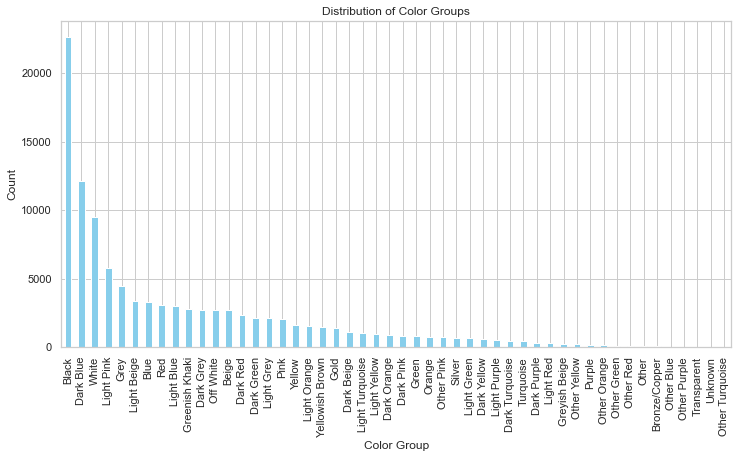

In [82]:
import matplotlib.pyplot as plt

color_group_counts = data_art['colour_group_name'].value_counts()
plt.figure(figsize=(12, 6))
color_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Color Groups')
plt.xlabel('Color Group')
plt.ylabel('Count')
plt.show()

In [85]:
import pandas as pd

black_color_data = data_art[data_art['colour_group_name'] == 'Black']

most_popular_black_products = black_color_data['product_code'].value_counts().nlargest(5)
print("Top 5 Most Popular Black Products:")
print(most_popular_black_products)

Top 5 Most Popular Black Products:
684021    18
807241    16
674606    15
627554    15
783707    14
Name: product_code, dtype: int64


In [90]:
import pandas as pd

black_color_data = data_art[data_art['colour_group_name'] == 'Black']

#analyze the distribution of products within the subset of black colors
most_popular_black_products = black_color_data['product_code'].value_counts().nlargest(5)

#merge with the original data to get additional information
merged_data = pd.merge(most_popular_black_products, data_art[['product_code', 'product_type_name']], left_index=True, right_on='product_code', how='left')

print("Top 5 Most Popular Black Products with Types:")
print(merged_data[['product_code', 'product_type_name', 'product_code_y']].to_string(index=False))

Top 5 Most Popular Black Products with Types:
 product_code product_type_name  product_code_y
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          684021
       684021           T-shirt          6

In [96]:
black_color_data = data_art[data_art['colour_group_name'] == 'Black']
product_code_counts = black_color_data['product_code'].value_counts().reset_index(name='total_count')

#the top 5 most popular black products
top5_popular_black_products = product_code_counts.nlargest(5, 'total_count')

#merge with the original data to get additional information
merged_data = pd.merge(top5_popular_black_products, product_counts[['product_code', 'product_type_name']], left_on='index', right_index=True, how='left')

#display only the product code, product type, summed count, and unique product types in 5 rows
print("\nTop 5 most popular black products with types, summed counts, and unique product types:")
merged_data['unique_product_types'] = merged_data['index'].apply(
    lambda code: ', '.join(product_counts[product_counts['product_code'] == code]['product_type_name'].unique())
)
print(merged_data[['index', 'product_type_name', 'total_count', 'unique_product_types']].to_string(index=False))


Top 5 most popular black products with types, summed counts, and unique product types:
 index product_type_name  total_count unique_product_types
684021               NaN           18              T-shirt
807241               NaN           16                Socks
674606               NaN           15                Skirt
627554               NaN           15      Leggings/Tights
783707               NaN           14                Socks


#### index

In [98]:
#count unique index codes
unique_indices = data_art['index_code'].nunique()

#count unique index groups
unique_index_groups = data_art['index_group_name'].nunique()

print(f"Number of unique indices: {unique_indices}")
print(f"Number of unique index groups: {unique_index_groups}")

Number of unique indices: 10
Number of unique index groups: 5


In [99]:
#group by index code and index group to explore relationships
index_group_stats = data_art.groupby(['index_code', 'index_group_name']).agg({
    'product_code': 'count',
    'product_type_name': pd.Series.nunique,  # Number of unique product types
    'department_name': pd.Series.mode  # Most frequent department name
}).reset_index()

#the result
print("\nStatistics on index codes and index groups:")
print(index_group_stats)


Statistics on index codes and index groups:
  index_code index_group_name  product_code  product_type_name  \
0          A       Ladieswear         26001                 71   
1          B       Ladieswear          6775                 27   
2          C       Ladieswear          6961                 46   
3          D          Divided         15149                 74   
4          F         Menswear         12553                 65   
5          G    Baby/Children          8875                 69   
6          H    Baby/Children         12007                 44   
7          I    Baby/Children          9214                 35   
8          J    Baby/Children          4615                 59   
9          S            Sport          3392                 33   

           department_name  
0                   Jersey  
1      Expressive Lingerie  
2                Jewellery  
3        Tops Fancy Jersey  
4             Jersey Fancy  
5              Baby basics  
6   Kids Girl Jersey Fanc

In [104]:
most_popular_index_groups = data_art['index_group_name'].value_counts().nlargest(5)

print("\nTop 5 most popular index groups:")
print(most_popular_index_groups)


Top 5 most popular index groups:
Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64


##### Products

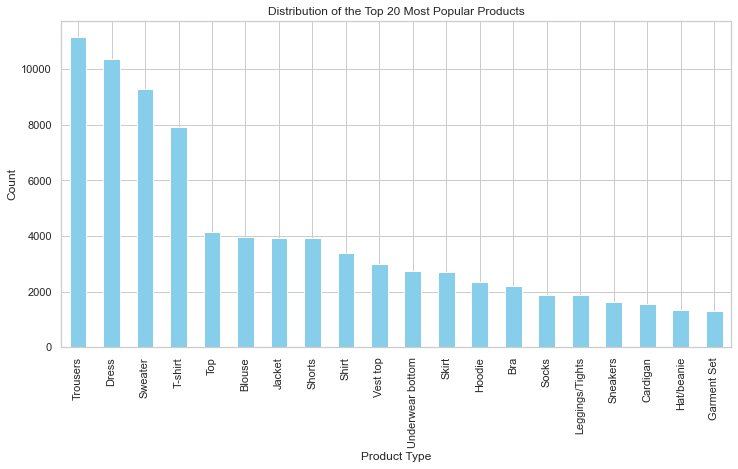

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

#how many times each product type appears?
product_counts = data_art['product_type_name'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of the Top 20 Most Popular Products')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

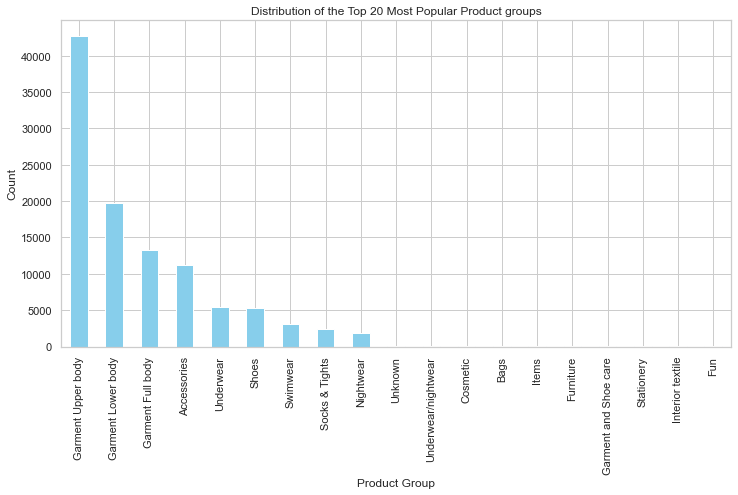

In [108]:
product_group_counts = data_art['product_group_name'].value_counts().nlargest(20)

#how many times each product group appears?
plt.figure(figsize=(12, 6))
product_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of the Top 20 Most Popular Product groups')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.show()

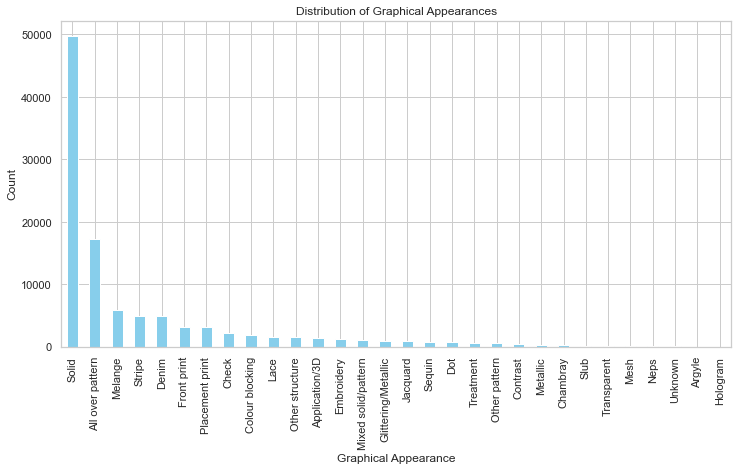

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

graphical_appearance_counts = data_art['graphical_appearance_name'].value_counts()

plt.figure(figsize=(12, 6))
graphical_appearance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Graphical Appearances')
plt.xlabel('Graphical Appearance')
plt.ylabel('Count')
plt.show()

In [110]:
#group by graphical appearance and analyze statistics
graphical_appearance_stats = data_art.groupby('graphical_appearance_name').agg({
    'product_type_name': pd.Series.nunique,  # Number of unique product types
    'department_name': pd.Series.mode  # Most frequent department name
}).reset_index()

print("\nStatistics on Graphical Appearances:")
print(graphical_appearance_stats)


Statistics on Graphical Appearances:
   graphical_appearance_name  product_type_name           department_name
0           All over pattern                 87    Kids Girl Jersey Fancy
1             Application/3D                 58    Kids Girl Jersey Fancy
2                     Argyle                  9  [Jersey Fancy, Knitwear]
3                   Chambray                 28        Young Girl Dresses
4                      Check                 50                   Trouser
5            Colour blocking                 52              Jersey Fancy
6                   Contrast                 42       Expressive Lingerie
7                      Denim                 22            Denim Trousers
8                        Dot                 51                    Jersey
9                 Embroidery                 44          Projects Dresses
10               Front print                 46   Young Girl Jersey Fancy
11       Glittering/Metallic                 63           Kids Girl Shoes


In [111]:
#the most common graphical appearances
top_n_appearances = data_art['graphical_appearance_name'].value_counts().nlargest(10)

print("\nTop 10 Most Common Graphical Appearances:")
print(top_n_appearances)


Top 10 Most Common Graphical Appearances:
Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Front print          3215
Placement print      3098
Check                2178
Colour blocking      1830
Lace                 1513
Name: graphical_appearance_name, dtype: int64
